# functions 

In [155]:
# import the necessary packages
import numpy as np
import cv2
def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)
	# normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()
	# return the histogram
	return hist

In [156]:
def plot_colors(hist, centroids):
	# initialize the bar chart representing the relative frequency
	# of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
	colors = []
	# loop over the percentage of each cluster and the color of
	# each cluster
	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		colors.append(color)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar,colors

# Contours and cropping for roi

In [157]:
from skimage.metrics import structural_similarity
import cv2
import numpy as np
import os.path, sys
# Load images

after =  cv2.imread('D:/new/empty/InspectInFrn_911.bmp') #empty image
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)
# Convert images to grayscale
path = "D:/new/defect3/" #folder of the images
dirs = os.listdir(path)
x1 = []
w1 = []
y1 = []
h1 = []
for i in dirs:
    if os.path.isfile(path+i):
#         im = Image.open(path+i)
        f, e = os.path.splitext(path+i)
       
        print(f)
        before = cv2.imread(path+i)
        before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)

        # Compute SSIM between the two images
        (score, diff) = structural_similarity(before_gray, after_gray, full=True)
        print("Image Similarity: {:.4f}%".format(score * 100))
        a,b = i.split(".")

        # The diff image contains the actual image differences between the two images
        # and is represented as a floating point data type in the range [0,1] 
        # so we must convert the array to 8-bit unsigned integers in the range
        # [0,255] before we can use it with OpenCV
        diff = (diff * 255).astype("uint8")
        diff_box = cv2.merge([diff, diff, diff])

        # Threshold the difference image, followed by finding contours to
        # obtain the regions of the two input images that differ
        thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours = contours[0] if len(contours) == 2 else contours[1]
        
        mask = np.zeros(before.shape, dtype='uint8')
        filled_after = after.copy()
        
        for c in contours:
            area = cv2.contourArea(c)
            if area > 1500:
                
                x,y,w,h = cv2.boundingRect(c)
                cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
                print(x,y,x+w,y+h)
                x1.append(x)
                y1.append(y)
                w1.append(w)
                h1.append(h)
        cv2.imshow('before', before)
        cv2.waitKey()
       

D:/new/defect3/InspectInFrn_1
Image Similarity: 73.0118%
36 77 92 178


In [158]:
print(x1)

[36]


# Dominant colors

36
3


C:\Users\Jekson\anaconda3\envs\label\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


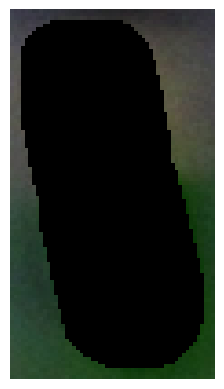

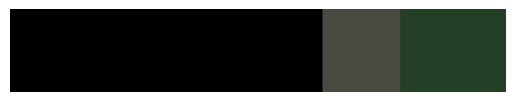

In [159]:
# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import utils
import cv2
l=0
colors1=[]
dirs = os.listdir(path)
for i in dirs:
    if os.path.isfile(path+i):
        
        print(x1[l])
#         im = Image.open(path+i)
        f, e = os.path.splitext(path+i)
        img = cv2.imread(path+i)
        crop = img[y1[l]:y1[l]+h1[l],x1[l]:x1[l]+w1[l]]
        image =  crop
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        a,b,c=image.shape
        print(c)
        # show our image
        plt.figure()
        plt.axis("off")
        plt.imshow(image)
        # reshape the image to be a list of pixels
        image = image.reshape((image.shape[0] * image.shape[1], 3))
        # cluster the pixel intensities
        clt = KMeans(n_clusters = 3)
        clt.fit(image)
        
        # build a histogram of clusters and then create a figure
        colors = []
        hist = centroid_histogram(clt)
        bar,colors = plot_colors(hist, clt.cluster_centers_)
        # show our color bar
        l=l+1
        plt.figure()
        plt.axis("off")
        plt.imshow(bar)
        plt.show()

        
        colors1.append(colors)
#         print(colors)

In [160]:
for i in range(len(colors1)):
    a = len(colors1)
    for j in range(a):
        
        if(colors1[i][j][0]<10 and colors1[i][j][1]<10 and colors1[i][j][2]<10):
            print(i,j)
            del(colors1[i][j])
            a = a-1
            

0 0


In [166]:
print(colors1[0][0])

[73.70674157 75.83146067 67.35393258]


# black color removal


In [163]:
from PIL import Image
from PIL import Image
import os.path, sys

path = "D:/new/defect4/"  #folder of the images
dirs = os.listdir(path)
empty = Image.open('D:/new/empty/InspectInFrn_911.bmp') #empty image
empty = empty.convert("RGB")
data = empty.getdata()
for i in dirs:
    if os.path.isfile(path+i):
        im = Image.open(path+i)
        f, e = os.path.splitext(path+i)
       
#         print(im)
        img = im.convert("RGB")

        datas = img.getdata()
        print(type(i))
        a,b = i.split(".")

        new_image_data = []
        for i,item in enumerate(datas):
            # change all white (also shades of whites) pixels to yellow

            if item[0] in list(range(0,1)):
                new_image_data.append((data[i]))
            else:
                new_image_data.append(item)

            # update image data
        img.putdata(new_image_data)
        path1 = path + "black/"
        if(os.path.exists(path1) == False):
            os.mkdir(path1)
#         print(path1)
                # save new image
        img.save(path1+ a+ '_edit' + '.bmp')

# show image in preview
# plt.imshow(img)

<class 'str'>
<class 'str'>


In [170]:
print(colors[0][0]+60)

133.70674157303358


# reflection removal

In [176]:
from PIL import Image
import os.path, sys

path1 = path + "black/"  #folder of the images
dirs = os.listdir(path1)
empty = Image.open('D:/new/empty/InspectInFrn_911.bmp') #empty image
empty = empty.convert("RGB")
data = empty.getdata()
for i in dirs:
    if os.path.isfile(path1+i):
        im = Image.open(path1+i)
        f, e = os.path.splitext(path1+i)
       
     
        img = im.convert("RGB")

        datas = img.getdata()
  
        a,b = i.split(".")

        new_image_data = []
        for i,item in enumerate(datas):
            # change all white (also shades of whites) pixels to yellow
            
            if item[0] in list(range(int(colors1[0][0][0]-20),int(colors1[0][0][0]+60))) and item[1] in list(range(int(colors1[0][0][1]-20),int(colors1[0][0][1]+60))) and item[2] in list(range(int(colors1[0][0][2]-20),int(colors1[0][0][2]+60))):
                new_image_data.append((data[i]))
            elif item[0] in list(range(int(colors1[0][1][0]-20),int(colors1[0][1][0]+60))) and item[1] in list(range(int(colors1[0][1][1]-20),int(colors1[0][1][1]+60))) and item[2] in list(range(int(colors1[0][1][2]-20),int(colors1[0][1][2]+60))):
                new_image_data.append((data[i]))
#                 print(i)
            else:
                new_image_data.append(item)

            # update image data
        img.putdata(new_image_data)
        path2 = path + "reflection_remove/"
        if(os.path.exists(path2) == False):
            os.mkdir(path2)
#         print(path1)
                # save new image
        img.save(path2+ a+ '_edit_reflection' + '.bmp')

# show image in preview
# plt.imshow(img)

# Structural difference

In [177]:
from skimage.metrics import structural_similarity
import cv2
import numpy as np
import os.path, sys
# Load images

after =  cv2.imread('D:/new/empty/InspectInFrn_911.bmp') #empty image
after_gray = cv2.cvtColor(after, cv2.COLOR_BGR2GRAY)
# Convert images to grayscale
path4 = path2 #folder of the images
dirs = os.listdir(path4)
for i in dirs:
    if os.path.isfile(path4+i):
#         im = Image.open(path+i)
        f, e = os.path.splitext(path4+i)

        print(f)
        before = cv2.imread(path4+i)
        before_gray = cv2.cvtColor(before, cv2.COLOR_BGR2GRAY)

        # Compute SSIM between the two images
        (score, diff) = structural_similarity(before_gray, after_gray, full=True)
        print("Image Similarity: {:.4f}%".format(score * 100))
        a,b = i.split(".")

        # The diff image contains the actual image differences between the two images
        # and is represented as a floating point data type in the range [0,1] 
        # so we must convert the array to 8-bit unsigned integers in the range
        # [0,255] before we can use it with OpenCV
        diff = (diff * 255).astype("uint8")
        diff_box = cv2.merge([diff, diff, diff])

        # Threshold the difference image, followed by finding contours to
        # obtain the regions of the two input images that differ
        thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contours = contours[0] if len(contours) == 2 else contours[1]

        mask = np.zeros(before.shape, dtype='uint8')
        filled_after = after.copy()

        for c in contours:
            area = cv2.contourArea(c)
            if area > 800:
                x,y,w,h = cv2.boundingRect(c)
                cv2.rectangle(before, (x, y), (x + w, y + h), (36,255,12), 2)
                cv2.rectangle(after, (x, y), (x + w, y + h), (36,255,12), 2)
                cv2.rectangle(diff_box, (x, y), (x + w, y + h), (36,255,12), 2)
                cv2.drawContours(mask, [c], 0, (255,255,255), -1)
                cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)
        print(f)
        path3 = path + "difference/"
        if(os.path.exists(path3) == False):
            os.mkdir(path3)
        cv2.imwrite(path3 + a + '_before' + '.bmp',before)
        cv2.imwrite(path3 + a + '_mask' + '.bmp',mask)
        cv2.imshow('before', before)
        cv2.imshow('after', after)
        cv2.imshow('diff', diff)
        cv2.imshow('diff_box', diff_box)
        cv2.imshow('mask', mask)
        cv2.imshow('filled after', filled_after)
        
        cv2.waitKey()
       

D:/new/defect4/reflection_remove/InspectInFrn_371_edit_edit_reflection
Image Similarity: 95.5885%
D:/new/defect4/reflection_remove/InspectInFrn_371_edit_edit_reflection
D:/new/defect4/reflection_remove/InspectInFrn_373_edit_edit_reflection
Image Similarity: 93.0209%
D:/new/defect4/reflection_remove/InspectInFrn_373_edit_edit_reflection


In [1]:
import cvat_sdk

In [2]:
pip install "cvat-sdk[pytorch]"

     -------------------------------------- 162.6/162.6 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
from cvat_sdk.api_client.api.auth_api import AuthApi

In [2]:
from cvat_sdk.api_client.api.cloudstorages_api import CloudstoragesApi
from cvat_sdk.api_client.api.comments_api import CommentsApi
from cvat_sdk.api_client.api.invitations_api import InvitationsApi
from cvat_sdk.api_client.api.issues_api import IssuesApi

NameError: name 'cvat' is not defined

In [4]:
from cvat_sdk.api_client.api.issues_api import IssuesApi
from cvat_sdk.api_client.api.jobs_api import JobsApi
from cvat_sdk.api_client.api.lambda_api import LambdaApi
from cvat_sdk.api_client.api.memberships_api import MembershipsApi
from cvat_sdk.api_client.api.organizations_api import OrganizationsApi
from cvat_sdk.api_client.api.projects_api import ProjectsApi
from cvat_sdk.api_client.api.schema_api import SchemaApi
from cvat_sdk.api_client.api.server_api import ServerApi
from cvat_sdk.api_client.api.tasks_api import TasksApi
from cvat_sdk.api_client.api.users_api import UsersApi
from cvat_sdk.api_client.api.webhooks_api import WebhooksApi

In [ ]:
conda run cvat-cli